# Linear Regression



[Appunti](#appunti)<br>
[Sklearn](#sklearn)<br>
[Linear Regression](#linearR)<br>
[Target prediction](#prediction)<br>
[Train Test Split](#traintestslpit)<br>
[Controllo Errori](#errori)<br>
[Multi Linear Regression](#multilinreg)<br>

<img src= 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/lin_reg.png' width=600>

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

In [102]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/datalr.csv

In [103]:
path = "datalr.csv"

## Life is easier with Sklearn <3 ## 
<a id='sklearn'></a>

Text(0.5, 1.0, 'Original Dataset')

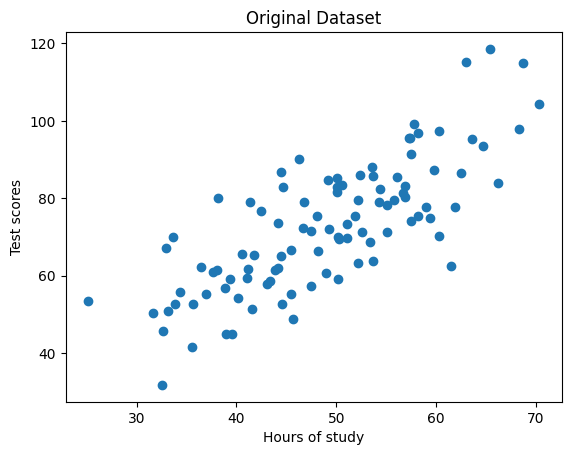

In [111]:
points = np.genfromtxt(path, delimiter=',')

#Extract columns
x = np.array(points[:,0])
y = np.array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Original Dataset')
#plt.show()

### Gli array in sklearn devono essere bidimensionali ###

In [112]:
# Verifica dimensionalità!!!
x.ndim

1

### Con 'reshape', ridimensioniamo l'array ### 

In [113]:
x.reshape(-1, 1).ndim

2

### In ML le feature vanno indicate con la 'X' maiuscola e le target con la 'y' minuscola ###

In [114]:
X = x.reshape(-1, 1) # features only with 'X'
y = y # target continua 

## Creiamo un modello con la regressione ##
<a id='linearR'>

In [115]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression()

In [116]:
# Beta regressor
model.coef_

array([1.32243102])

In [117]:
# Intercept
model.intercept_

7.991020982270399

### Troviamo il valore continuo della target ###
<a id='prediction'></a>

In [118]:
# y = 7.99 + 1.32*x

In [119]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Simple Linear Regression')

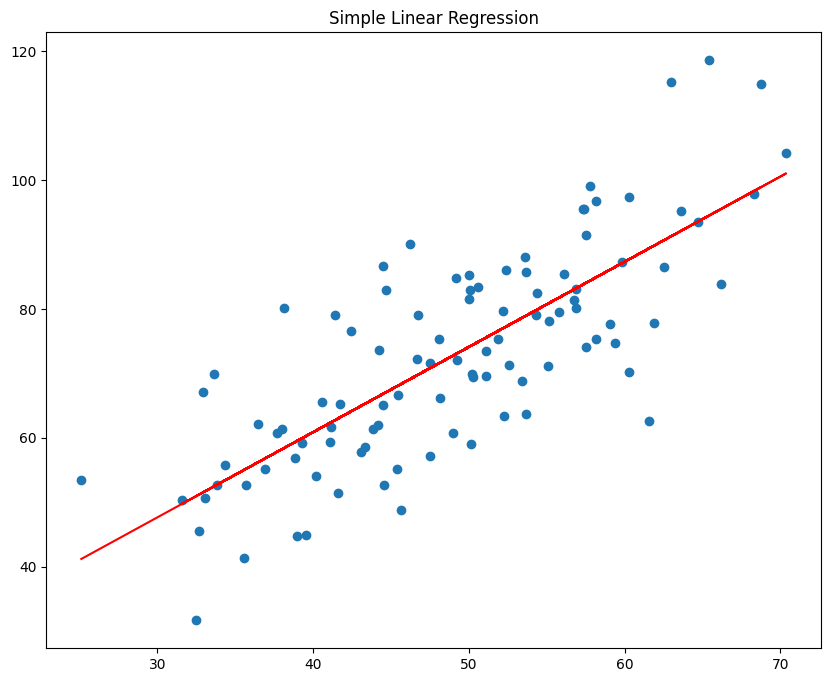

In [120]:
plt.figure(figsize = (10, 8))

plt.scatter(x, y)
plt.plot(x, y_pred,'-r')
plt.title('Simple Linear Regression')

Text(0.5, 0, 'Errors')

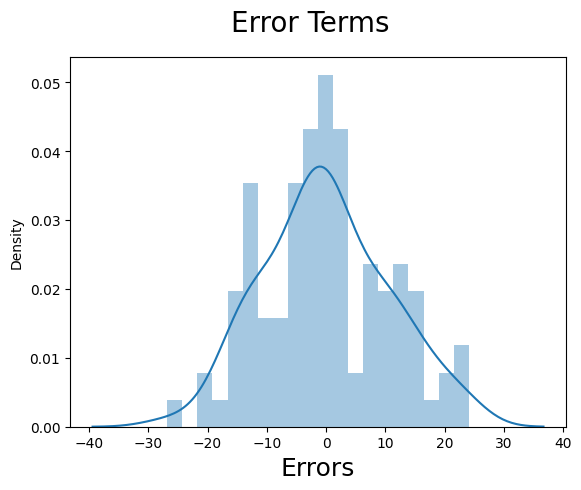

In [121]:
import seaborn as sns

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         

In [122]:
import plotly.express as px

fig = px.scatter(x=x, y=y, opacity=0.65,
                trendline='ols', trendline_color_override='darkblue',width=800
                )
fig.show()

## Train Test Set

The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
<a id='traintestslpit'>

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris_8.png' width=650>

In [123]:
from sklearn.model_selection import train_test_split #Tramite la libreria di sklearn importiamo la funzione per dividere il data set in due parti
                                                     #80% train e 20% test

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [125]:
X_train.shape, X_test.shape

((80, 1), (20, 1))

In [126]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [127]:
model.coef_

array([1.28944624])

In [128]:
model.intercept_

9.664498626786127

In [129]:
y_pred = model.predict(X_test)

## Controllo Errori ##
<a id='errori'>

In [130]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,65.521095,58.569825
1,62.766495,61.684038
2,81.622992,79.550437
3,83.813503,91.486778
4,76.988804,79.641973
5,83.035556,80.207523
6,73.110266,84.742698
7,83.813392,74.084130
8,53.935217,55.723489
9,74.187842,85.232007


In [131]:
res_df['error'] = res_df['real'] - res_df['predicted']  #Trovo ivalori degli errori tra i due target 
res_df

,predicted,real,error
0,65.521095,58.569825,-6.951271
1,62.766495,61.684038,-1.082457
2,81.622992,79.550437,-2.072555
3,83.813503,91.486778,7.673275
4,76.988804,79.641973,2.653169
5,83.035556,80.207523,-2.828033
6,73.110266,84.742698,11.632431
7,83.813392,74.084130,-9.729262
8,53.935217,55.723489,1.788272
9,74.187842,85.232007,11.044166


In [132]:
res_df['error'].mean()

-0.29298732665546756

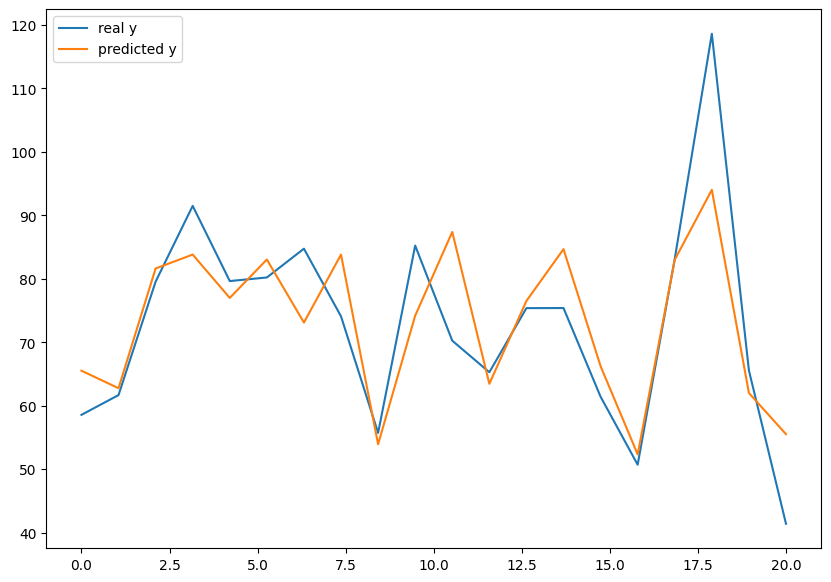

In [133]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y")
plt.legend(loc=2)

In [134]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y_test, name="real", mode="lines"))
fig.add_trace(go.Scatter(x=x, y=y_pred, name="predicted", mode="lines"))
fig.update_layout(title="Error from prediction on Test Set", xaxis_title="Obeservation", yaxis_title="Value",width=900)
fig.show()

## Ripetere esercizio di ML Linear Regression con dati generati random secondo l'equazione y=3x+epsylon

In [135]:
generate_random = np.random.RandomState(667)

rng = np.random.default_rng()

noise = rng.standard_normal(100)

s = np.random.randn(100)

noise2 = rng.normal(0,0.5,100)

x = 10 * generate_random.rand(100)

y =  3 * x + noise2

X = x.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression()

In [136]:
noise2

array([-0.30740658, -0.86244194, -0.11961078, -0.04111204,  0.68983675,
        0.86082009,  0.3086999 ,  0.05838182, -0.10511197,  0.58164833,
       -0.45113755,  0.07591044, -0.24816551,  0.60438661, -0.24840918,
       -0.03755324,  0.63386593,  0.72378913,  1.19882897,  0.04418513,
        0.35845441,  0.20033797, -0.26545286, -0.48174344, -0.28929689,
       -0.42131604, -0.40105516, -0.15107966, -1.00949578, -0.40395287,
       -0.10548403, -0.27287979, -1.29665393,  0.06069512,  0.16385043,
       -0.54993289, -0.98956426, -0.51123628, -0.15092342, -0.39143364,
        0.39145014,  0.16788767,  0.1239868 , -0.03409996,  0.78779866,
        0.31215152, -0.44177406, -0.03137446,  0.32442121,  0.67170616,
        0.2059079 ,  0.7561281 ,  0.3509795 ,  0.02919477, -0.38525249,
       -0.86440881,  0.21983266, -0.05388122,  0.57860231, -0.39479904,
        0.15982896,  0.38031864, -0.57378739, -0.48891851, -0.21279782,
        0.97196154,  0.11810631,  0.79329923,  0.657793  ,  0.06

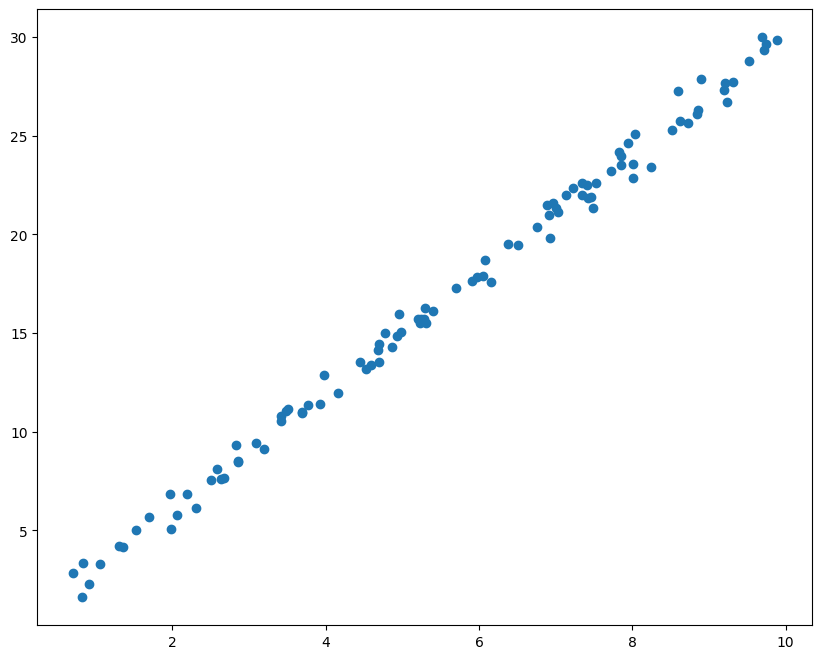

In [137]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y)

Text(0.5, 1.0, 'Simple Linear Regression')

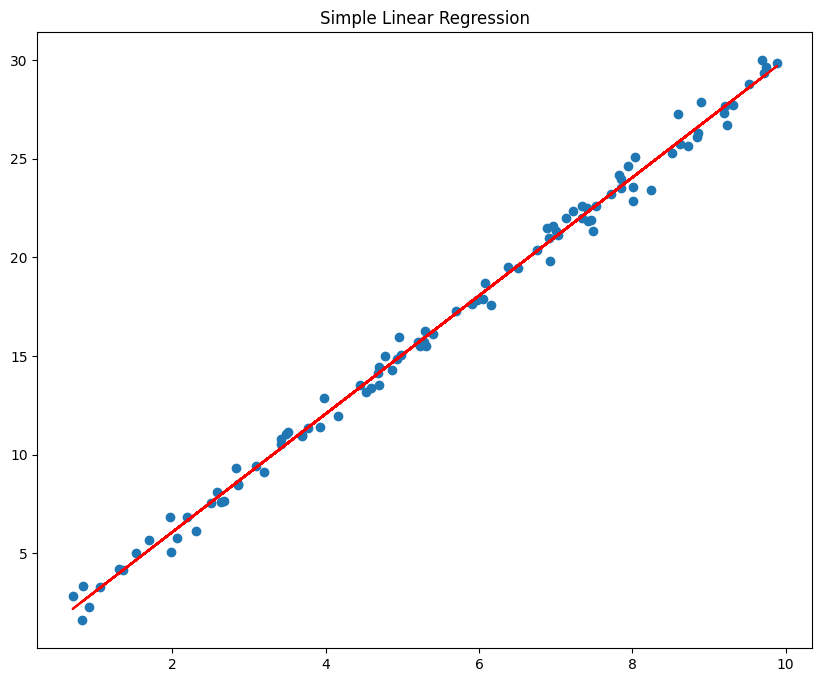

In [138]:
plt.figure(figsize = (10, 8))
y_pred = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_pred,'-r')
plt.title('Simple Linear Regression')

In [139]:
## definire vettore Feature e target X y ...

## Multiple Linear Regression ##
<a id='multilinreg'>

In [140]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objs as go

# create sample data
np.random.seed(667)
n_samples = 100
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
y = 2*x1 + 3*x2 + np.random.randn(n_samples)

# create pandas dataframe
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# perform multiple linear regression
X = df[['x1', 'x2']]
y = df['y']
model = LinearRegression().fit(X, y)

# create 3D scatter plot and plane prediction
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 10)
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 10)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
##Prediction Plane
zz = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
zz = zz.reshape(xx1.shape)

In [141]:
model.intercept_

-0.01179784465570255

In [142]:
model.coef_

array([2.04980515, 3.03499985])

In [143]:
# y = -0.0118 + 2.05*x1+ 3.035*x2

In [144]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['x1'], y=df['x2'], z=df['y'], mode='markers', name='Data Points'))
fig.add_trace(go.Surface(x=xx1, y=xx2, z=zz, opacity=0.9, name='Plane Prediction'))
fig.update_layout(title='Plane Prediction', scene=dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='y'))
fig.show()

In [145]:
# make a plane prediction
x1_pred = 1.5
x2_pred = 0.5
y_pred = model.predict([[x1_pred, x2_pred]])
print('Predicted y value for x1 = {} and x2 = {}: {}'.format(x1_pred, x2_pred, y_pred[0]))

Predicted y value for x1 = 1.5 and x2 = 0.5: 4.580409809783164


In [146]:
##esercizio regressione lineare Multipla

#https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Startup.csv

In [147]:
#https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv